# Linear Regression Parameters using JAX
This notebook demonstrates how to calculate linear regression parameters (a and b) using JAX arrays.

In [1]:
import jax.numpy as jnp
from jax import grad, jit
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Generate some sample data
X = np.array([1,2,-1,1])
y = np.array([2,3,-1,-1])
# Convert to JAX arrays
X_jax = jnp.array(X)
y_jax = jnp.array(y)

## Define the Mean Squared Error Loss Function

In [14]:
def mse_loss(params, X, y):
    a, b = params
    y_pred = a * X + b
    return jnp.mean((y_pred - y) ** 2)

## Calculate Gradients and Update Parameters

In [16]:
# Initialize parameters
params = jnp.array([1.0, 2.0])  # [a, b]
learning_rate = 0.01
iterations = 5000

# Get gradient function
grad_loss = jit(grad(mse_loss))

# Training loop
for i in range(iterations):  # Changed n_iterations to iterations
    grads = grad_loss(params, X_jax, y_jax)
    params = params - learning_rate * grads

    if i % 100 == 0:
        loss = mse_loss(params, X_jax, y_jax)
        print(f"Iteration {i}, Loss: {loss:.4f}, Parameters: a={params[0]:.4f}, b={params[1]:.4f}")


Iteration 0, Loss: 5.2817, Parameters: a=0.9750, b=1.9600
Iteration 100, Loss: 1.6775, Parameters: a=0.8747, b=0.4042
Iteration 200, Loss: 1.4740, Parameters: a=1.0936, b=0.0315
Iteration 300, Loss: 1.4504, Parameters: a=1.1707, b=-0.0935
Iteration 400, Loss: 1.4477, Parameters: a=1.1970, b=-0.1360
Iteration 500, Loss: 1.4474, Parameters: a=1.2059, b=-0.1505
Iteration 600, Loss: 1.4474, Parameters: a=1.2090, b=-0.1554
Iteration 700, Loss: 1.4474, Parameters: a=1.2100, b=-0.1570
Iteration 800, Loss: 1.4474, Parameters: a=1.2103, b=-0.1576
Iteration 900, Loss: 1.4474, Parameters: a=1.2105, b=-0.1578
Iteration 1000, Loss: 1.4474, Parameters: a=1.2105, b=-0.1579
Iteration 1100, Loss: 1.4474, Parameters: a=1.2105, b=-0.1579
Iteration 1200, Loss: 1.4474, Parameters: a=1.2105, b=-0.1579
Iteration 1300, Loss: 1.4474, Parameters: a=1.2105, b=-0.1579
Iteration 1400, Loss: 1.4474, Parameters: a=1.2105, b=-0.1579
Iteration 1500, Loss: 1.4474, Parameters: a=1.2105, b=-0.1579
Iteration 1600, Loss: 1

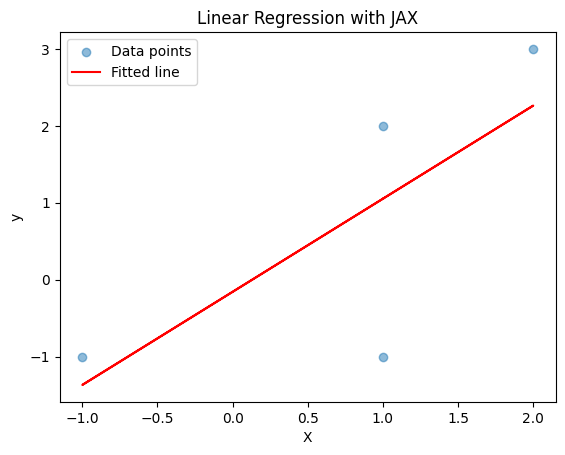

In [17]:
# Plot the results
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, params[0] * X + params[1], 'r', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with JAX')
plt.legend()
plt.show()